# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_computing_audio_time_lag.py are installed in 
# your environment or in the same file pathway. 
import functions_computing_audio_time_lag


# INPUTTING PARAMETERS

In [2]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS:
ainp              = 'ainp1'
block_id          = 'Block1'
date              = '2023_01_06'
dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
file_extension    = 'hdf5'
patient_id        = 'CC01'
task              = 'Speller' 

"""
INPUT VARIABLES:
ainp:              [string]; BNC ports recorded by BCI2000. Choose the port in which the audio signal was recorded.
                   Options are: 'ainp1', 'ainp2', 'ainp3'.
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
file_extension:    [string (hdf5/mat)]; The file type of BCI2000 data from which the audio signal will be extracted.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

# EXTRACTING AUDIO FROM BCI2000

In [3]:
"""
DESCRIPTION:
Extracting the audio signal recorded by BCI2000 as an array using the experimenter-specified analog port. The BCI2000
data from which the audio signal is extracted is in the following pathway:

'/mnt/shared/ecog/' + patient_id + '/' + file_extension + '/' + date + '/' + task + '_' + block_id + '.' +
file_extension

Feel free to modify the pathway in which the BCI2000 data is stored and the necessary experimenter inputs appropriately.

INPUT VARIABLES:
ainp:           [string]; BNC ports recorded by BCI2000. Choose the port in which the audio signal was recorded. Options
                are: 'ainp1', 'ainp2', 'ainp3'.
block_id:       [String (BlockX, where X is an int)]; Block ID of the task that was run.
date:           [string (YYYY_MM_DD)]; Date on which the block was run.
file_extension: [string (hdf5/mat)]; The file type of BCI2000 data from which the audio signal will be extracted.
patient_id:     [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:           [string]; Type of task that was run.                   

OUTPUT VARIABLES:
audio_from_bci2k:               [xarray > floats]; Audio signal recorded from BCI2000. Time dimension is in units of s.
sampling_rate_audio_from_bci2k: [int (units: Hz)]; The sampling rate of the audio signal from BCI2000.
"""

# COMPUTATION:

# Extracting BCI2000 audio information.
audio_from_bci2k,\
sampling_rate_audio_from_bci2k = functions_computing_audio_time_lag.extract_audio_from_bci2k(ainp, block_id, date,\
                                                                                             file_extension,\
                                                                                             patient_id, task)



AUDIO SAMPLING RATE (sa/s):
1000

AUDIO SIGNAL:
<xarray.DataArray (time_seconds: 939100)>
array([12.,  9.,  8., ...,  2.,  8., 17.])
Coordinates:
  * time_seconds  (time_seconds) float64 0.0 0.001 0.002 ... 939.1 939.1 939.1


# EXTRACTING AUDIO FROM VIDEO

In [4]:
 """
DESCRIPTION:
Extracting as an array the audio signal recorded by the video using the .wav file converted from Microsoft OBS. The 
video data of the participant's hand are in the following pathway:

dir_intermediates + patient_id + '/' + task + '/' + 'Audio/' + date + '/'

Feel free to modify the pathway in which the video is stored and the necessary experimenter inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int)]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
audio_from_video:               [xarray (timesamples,)> floats]; Audio signal recorded from the video feed. Time 
                                dimension is in units of s.
sampling_rate_audio_from_video: [int (units: Hz)]; The sampling rate of the audio signal from the video file.
"""

# COMPUTATION:

# Extracting the audio from the video file. 
audio_from_video,\
sampling_rate_audio_from_video = functions_computing_audio_time_lag.extract_audio_from_video(block_id, date,\
                                                                                             dir_intermediates,\
                                                                                             patient_id, task)


/home/dan/Projects/ClickDetectorSpeller/Alignment/functions_computing_audio_time_lag.py:261: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, audio_signal = wavfile.read(audio_signal_path)



AUDIO SAMPLING RATE (sa/s):
48000

AUDIO SIGNAL:
<xarray.DataArray (time_seconds: 44710400)>
array([26., 33., 35., ...,  0.,  0.,  0.])
Coordinates:
  * time_seconds  (time_seconds) float64 0.0 2.083e-05 4.167e-05 ... 931.5 931.5


# DOWNSAMPLING THE AUDIO RESOLUTION FROM THE VIDEO TO MATCH THAT FROM BCI2000

In [5]:
"""
DESCRIPTION:
Downsampling the audio signal array from the video feed to match the time resolution of the audio signal array from 
BCI2000.

INPUT VARIABLES:
audio_from_video:               [xarray (timesamples,) > floats]; Audio signal recorded from the video feed. Time 
                                dimension is in units of s.
sampling_rate_audio_from_bci2k: [int (units: Hz)]; The sampling rate of the audio signal from BCI2000.
sampling_rate_audio_from_video: [int (units: Hz)]; The sampling rate of the audio signal from the video file.

OUTPUT VARIABLES:
audio_from_video: [xarray (timesamples,) > int]; Downsampled video audio signal array that matches the sampling rate of
                  the BCI2000 analog input. Time dimension is in units of s.
"""

# COMPUTATION:

# Computing the downsampled audio from the recorded video.
audio_from_video = functions_computing_audio_time_lag.downsample_video_audio_to_bci2k(audio_from_video,
                                                                                      sampling_rate_audio_from_bci2k,\
                                                                                      sampling_rate_audio_from_video)



AUDIO SIGNAL:
<xarray.DataArray (time_seconds: 931466)>
array([ 23., -33.,  18., ...,   0.,   0.,   0.])
Coordinates:
  * time_seconds  (time_seconds) float64 0.0009792 0.001979 ... 931.5 931.5


# PLOTTING AUDIO SIGNALS BEFORE ALIGNMENT

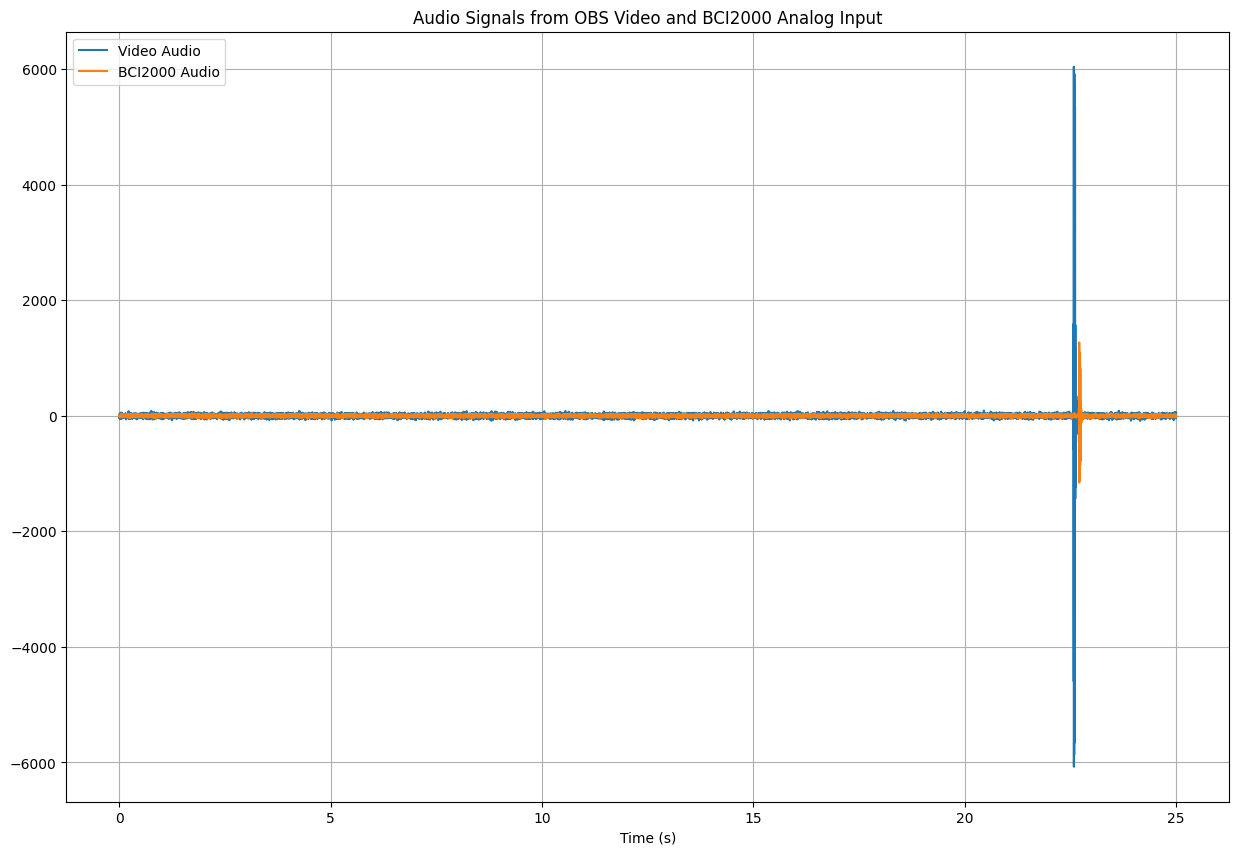

In [6]:
"""
DESCRIPTION:
Plotting the audio signals recorded from the video camera and by BCI2000 prior to alignment.
"""
# EXPERIMENTER INPUTS:
t_view_start = 0
t_view_end   = 25

"""
INPUT VARIABLES:
audio_from_bci2k: [xarray (timesamples,) > floats]; Audio signal recorded from BCI2000. Time dimension is in units of s.
audio_from_video: [xarray (timesamples,) > int]; Downsampled video audio signal array that matches the sampling rate of 
                  the BCI2000 analog input. Time dimension is in units of s.
                  input. Time dimension is in units of s.
t_view_end:       [float (units: s)]; End of viewing window.
t_view_start:     [float (units: s)]; Start of viewing window.
"""

# COMPUTATION:

# Plotting audio signals.
functions_computing_audio_time_lag.plotting_audio_signals(audio_from_bci2k, audio_from_video, t_view_end, t_view_start)


# CROSS CORRELATION

In [7]:
"""
DESCRIPTION:
Cross correlating the audio signals from BCI2000 and the OBS video feed to find how much the Video's audio lags behind 
the audio from BCI2000.
"""
# EXPERIMENTER INPUTS:
t_xcorr_start = 0
t_xcorr_end   = 50

"""
INPUT VARIABLES:
audio_from_bci2k:               [xarray (timesamples,) > floats]; Audio signal recorded from BCI2000. Time dimension is
                                in units of s.
audio_from_video:               [xarray (timesamples,) > int]; Downsampled video audio signal array that matches the 
                                sampling rate of the BCI2000 analog input. Time dimension is in units of s.
sampling_rate_audio_from_bci2k: [int (units: Hz)]; The sampling rate of the audio signal from BCI2000.
t_xcorr_end:                    [int (units: s)]; Describes the ending time point of the audio signal segment that will
                                be cross correlated.
t_xcorr_start:                  [int (units: s)]; Describes the starting time point of the audio signal segment that
                                will be cross correlated.

OUTPUT VARIABLES:
t_lag: [float (units: ms)]; The time lag between the audio from BCI2000 and the video audio. In other words, t_lag is 
       the amount of time that the BCI2000 audio signal is leading the video audio signal. If t_lag = 150 ms, this means
       that BCI2000 audio is ahead of the video audio by 150 ms. For example, an audio event registered by the video to
       be at 3.0 s would actually be registered at 3.15 s by BCI2000. 
"""

# COMPUTATION:

# Computing the lag between BCI2000 auditory signal and the video audio signal.
t_lag = functions_computing_audio_time_lag.cross_corr_audio(audio_from_bci2k, audio_from_video,\
                                                            sampling_rate_audio_from_bci2k, t_xcorr_end, t_xcorr_start)


Time lag (ms):  125


# ALIGNING THE BCI2000 AUDIO WITH THE VIDEO AUDIO

In [8]:
 """
DESCRIPTION:
Aligning the BCI2000 audio array with the video audio array according to the time lag of the video audio relative to the
BCI2000 audio. 

INPUT VARIABLES:
audio_from_bci2k: [xarray (timesamples,) > floats]; Audio signal recorded from BCI2000. Time dimension is in units of s.
t_lag:            [float (units: ms)]; The time lag between the audio from BCI2000 and the video audio. In other words,
                  t_lag is the amount of time that the BCI2000 audio signal is leading the video audio signal. If 
                  t_lag = 150 ms, this means that BCI2000 audio is ahead of the video audio by 150 ms. For example, an
                  audio event registered by the video to be at 3.0 s would actually be registered at 3.15 s by BCI2000. 

OUTPUT VARIABLES:
audio_from_bci2k_aligned: [xarray (timesamples,)> floats]; Aligned audio from BCI2000 accounting for the relative time
                          lag of the video audio. Time array is in units of s at BCI2000 sampling rate.
"""

# COMPUTATION:

# Aligning the BCI2000 audio according to the time lag of the video audio.
audio_from_bci2k_aligned = functions_computing_audio_time_lag.aligning_bci2000_audio_and_click(audio_from_bci2k, t_lag)


# PLOTTING AUDIO SIGNALS AFTER ALIGNMENT

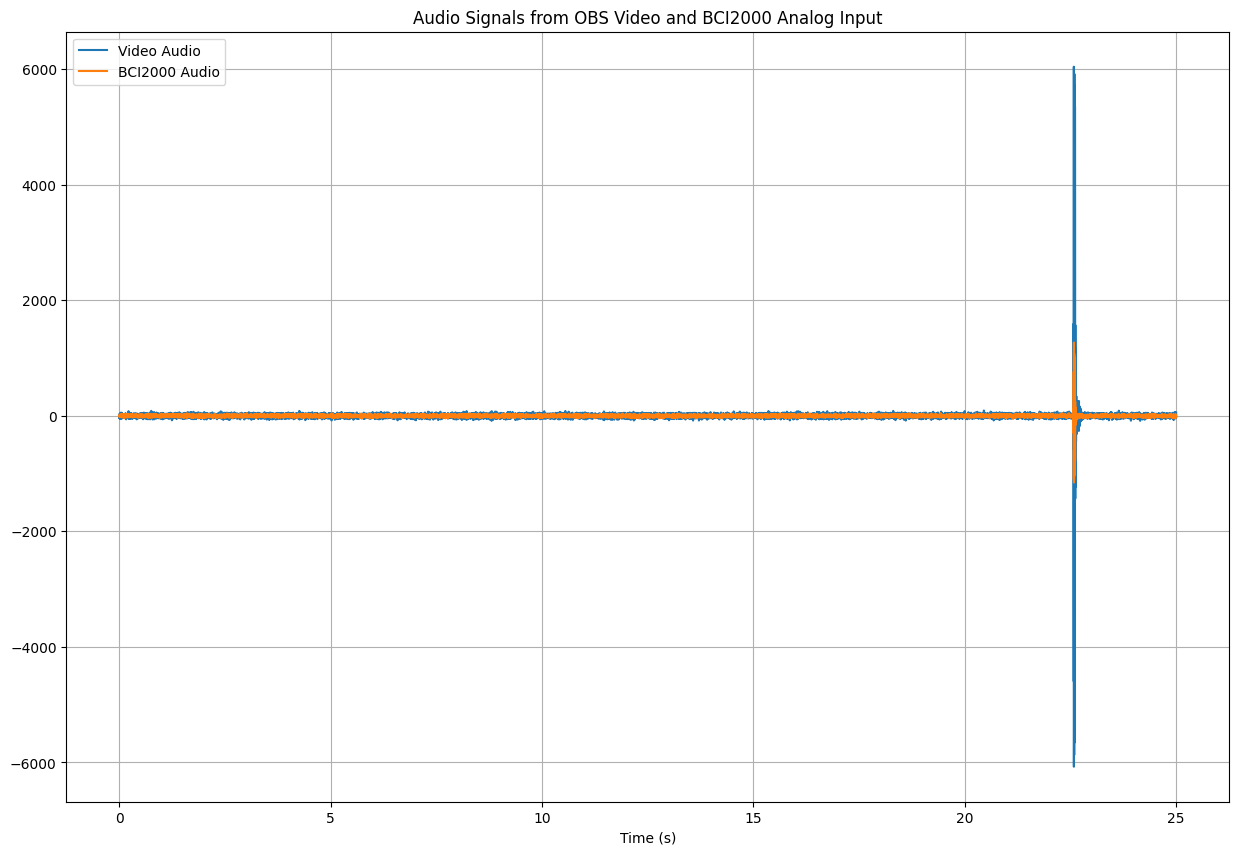

In [9]:
"""
DESCRIPTION:
Plotting the audio signals recorded from the video camera and by BCI2000 after alignment.

INPUT VARIABLES:
audio_from_bci2k_aligned: [xarray (timesamples,)> floats]; Aligned audio from BCI2000 accounting for the relative time
                          lag of the video audio. Time array is in units of s at BCI2000 sampling rate.
audio_from_video:         [xarray (timesamples,) > int]; Downsampled video audio signal array that matches the sampling
                          rate of the BCI2000 analog input. Time dimension is in units of s.
t_view_end:               [float (units: s)]; End of viewing window.
t_view_start:             [float (units: s)]; Start of viewing window.
"""

# COMPUTATION:

# Plotting audio signals.
functions_computing_audio_time_lag.plotting_audio_signals(audio_from_bci2k_aligned, audio_from_video, t_view_end,\
                                                          t_view_start)


# SAVING THE TIME LAG FOR THE CURRENT DATE AND BLOCK

In [10]:
"""
DESCRIPTION:
Saving the time lag to the appropriate pathway, shown below:

dir_intermediates + patient_id + '/' + task + '/' + 'LagsBetweenVideoAndBCI2000/' + date + '/' + block_id + '/' +
date + '_' + block_id + '.txt'

Feel free to modify the pathway in which the time lag is stored and the necessary experimenter inputs appropriately.
              
INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int)]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
t_lag:             [float (units: ms)]; The time lag between the audio from BCI2000 and the video audio. In other words,
                   t_lag is the amount of time that the BCI2000 audio signal is leading the video audio signal. If 
                   t_lag = 150 ms, this means that BCI2000 audio is ahead of the video audio by 150 ms. For example, an
                   audio event registered by the video to be at 3.0 s would actually be registered at 3.15 s by BCI2000. 
task:              [string]; Type of task that was run. 
"""

# COMPUTATION:

# Saving time lag.
functions_computing_audio_time_lag.save_time_lag(block_id, date, dir_intermediates, patient_id, t_lag, task)
